# Understand How to Perform Normalization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import Normalizer, normalize

In [2]:
real_estate_data = pd.read_csv("datasets/real_estate_data_processed.csv")

real_estate_data.head(10)

,house_age,Distance_to_MRT_Station,no_of_convenient_stores,house_price
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1
5,7.1,2175.03000,3,32.1
6,34.5,623.47310,7,40.3
7,20.3,287.60250,6,46.7
8,31.7,5512.03800,1,18.8
9,17.9,1783.18000,3,22.1


In [3]:
real_estate_data.describe()

,house_age,Distance_to_MRT_Station,no_of_convenient_stores,house_price
count,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,37.980193
std,11.392485,1262.109595,2.945562,13.606488
min,0.000000,23.382840,0.000000,7.600000
25%,9.025000,289.324800,1.000000,27.700000
50%,16.100000,492.231300,4.000000,38.450000
75%,28.150000,1454.279000,6.000000,46.600000
max,43.800000,6488.021000,10.000000,117.500000


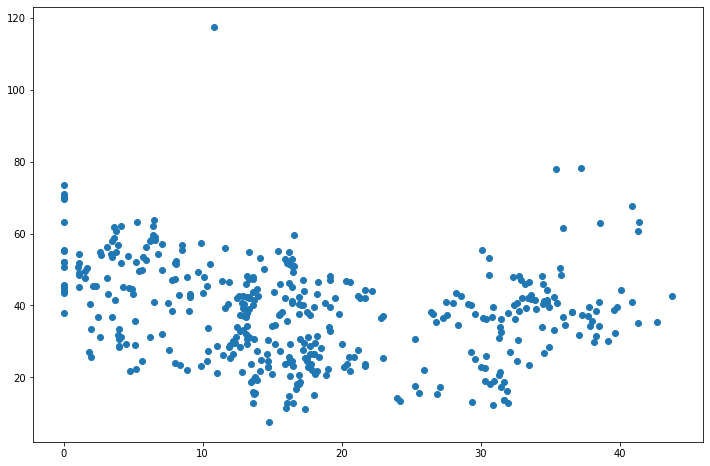

In [4]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(real_estate_data["house_age"], real_estate_data["house_price"])

In [5]:
def cosine_similarity_manual(h1, h2):
    
    x1 = h1[0]
    y1 = h1[1]

    x2 = h2[0]
    y2 = h2[1]
    
    magnitude = math.sqrt(x1*x1 + y1*y1) * math.sqrt(x2*x2 + y2*y2)
    
    dot_product = x1*x2 + y1*y2
    
    return dot_product / magnitude

In [6]:
h1 = real_estate_data.loc[0, ["house_age", "house_price"]]
h2 = real_estate_data.loc[6, ["house_age", "house_price"]]
h3 = real_estate_data.loc[3, ["house_age", "house_price"]]

In [10]:
h1

house_age      32.0
house_price    37.9
Name: 0, dtype: float64

In [11]:
h2

house_age      34.5
house_price    40.3
Name: 6, dtype: float64

In [12]:
h3

house_age      13.3
house_price    54.8
Name: 3, dtype: float64

In [13]:
cosine_similarity_manual(h1, h2)

0.9999767340968709

In [14]:
cosine_similarity_manual(h2, h3)

0.8916063957014956

In [15]:
cosine_similarity(h1.values.reshape(1, -1), h2.values.reshape(1, -1))

array([[0.99997673]])

In [16]:
cosine_similarity(h2.values.reshape(1, -1), h3.values.reshape(1, -1))

array([[0.8916064]])

In [19]:
house_age_house_price = real_estate_data[["house_age", "house_price"]]

normalized_df = pd.DataFrame(normalize(house_age_house_price, norm = "l2"),
                             columns = house_age_house_price.columns)

normalized_df.head()

,house_age,house_price
0,0.645129,0.764074
1,0.419467,0.907770
2,0.270687,0.962668
3,0.235854,0.971789
4,0.115236,0.993338


In [20]:
def cosine_similarity_manual_normalized(h1, h2):
    
    x1 = h1[0]
    y1 = h1[1]

    x2 = h2[0]
    y2 = h2[1]
    
    magnitude = 1
    
    dot_product = x1*x2 + y1*y2
    
    return dot_product / magnitude

In [21]:
h1 = normalized_df.loc[0, ["house_age", "house_price"]]
h2 = normalized_df.loc[6, ["house_age", "house_price"]]
h3 = normalized_df.loc[3, ["house_age", "house_price"]]

In [22]:
cosine_similarity_manual_normalized(h1, h2)

0.9999767340968709

In [23]:
cosine_similarity_manual_normalized(h2, h3)

0.8916063957014957